## Premier League Match Predictor Model

### 1. Aquiring Data and First look

In [78]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('premier-league-matches.csv')

# Display the first few rows of the DataFrame
df.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [79]:
df.tail()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A
12025,2023,38,2023-05-28,Brentford,1,0,Manchester City,H


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  12026 non-null  int64 
 1   Wk               12026 non-null  int64 
 2   Date             12026 non-null  object
 3   Home             12026 non-null  object
 4   HomeGoals        12026 non-null  int64 
 5   AwayGoals        12026 non-null  int64 
 6   Away             12026 non-null  object
 7   FTR              12026 non-null  object
dtypes: int64(4), object(4)
memory usage: 751.8+ KB


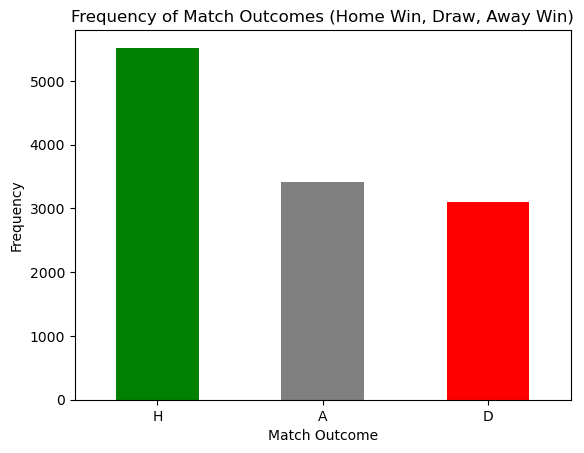

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called 'df'
# You can replace 'df' with your actual DataFrame name

# Create a bar plot showing the frequency distribution of 'FTR'
df['FTR'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])

# Customize the plot
plt.xlabel('Match Outcome')
plt.ylabel('Frequency')
plt.title('Frequency of Match Outcomes (Home Win, Draw, Away Win)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.show()


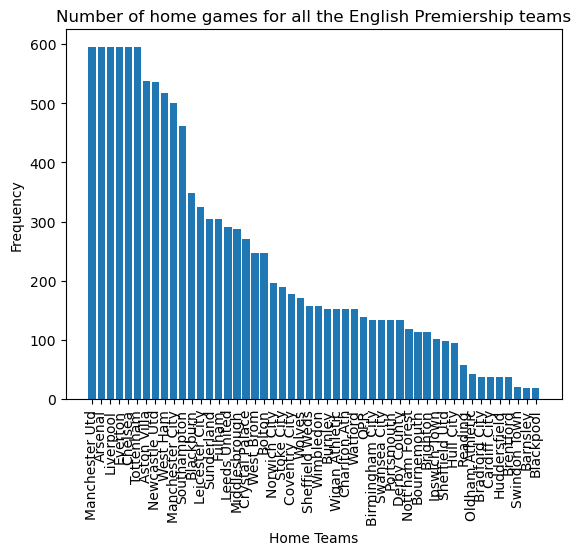

In [82]:
# create a figure and axis
fig, ax = plt.subplots()

# count the occurrence of each class
data = df['Home'].value_counts()

# get x and y data
points = data.index
frequency = data.values

# create bar chart
ax.bar(points, frequency)
plt.setp(ax.get_xticklabels(), rotation=90)

# set title and labels
ax.set_title('Number of home games for all the English Premiership teams')
ax.set_xlabel('Home Teams')
ax.set_ylabel('Frequency')

plt.show()


In [83]:
df.columns

Index(['Season_End_Year', 'Wk', 'Date', 'Home', 'HomeGoals', 'AwayGoals',
       'Away', 'FTR'],
      dtype='object')

## Checking for missing values!

In [84]:
print(df.isnull().sum())

Season_End_Year    0
Wk                 0
Date               0
Home               0
HomeGoals          0
AwayGoals          0
Away               0
FTR                0
dtype: int64


### Drop irrelevant columns

In [85]:
df_copy = df.copy()

In [86]:
irrelevant_columns = ['Season_End_Year', 'Wk', 'Date']

# Remove irrelevant columns from the copied dataset
df_copy.drop(columns=irrelevant_columns, inplace=True)


print(df_copy.head())

             Home  HomeGoals  AwayGoals            Away FTR
0   Coventry City          2          1   Middlesbrough   H
1    Leeds United          2          1       Wimbledon   H
2   Sheffield Utd          2          1  Manchester Utd   H
3  Crystal Palace          3          3       Blackburn   D
4         Arsenal          2          4    Norwich City   A


In [87]:
home_teams = df_copy['Home'].unique()
print("All different Home team options:")
print(home_teams)

All different Home team options:
['Coventry City' 'Leeds United' 'Sheffield Utd' 'Crystal Palace' 'Arsenal'
 'Ipswich Town' 'Everton' 'Southampton' 'Chelsea' "Nott'ham Forest"
 'Manchester City' 'Blackburn' 'Wimbledon' 'Tottenham' 'Liverpool'
 'Aston Villa' 'Oldham Athletic' 'Middlesbrough' 'Norwich City' 'QPR'
 'Manchester Utd' 'Sheffield Weds' 'Newcastle Utd' 'West Ham'
 'Swindon Town' 'Leicester City' 'Bolton' 'Sunderland' 'Derby County'
 'Barnsley' 'Charlton Ath' 'Watford' 'Bradford City' 'Fulham'
 'Birmingham City' 'West Brom' 'Portsmouth' 'Wolves' 'Wigan Athletic'
 'Reading' 'Hull City' 'Stoke City' 'Burnley' 'Blackpool' 'Swansea City'
 'Cardiff City' 'Bournemouth' 'Brighton' 'Huddersfield' 'Brentford']


In [88]:
away_teams = df_copy['Away'].unique()
print("All different Away team options:")
print(away_teams)


All different Away team options:
['Middlesbrough' 'Wimbledon' 'Manchester Utd' 'Blackburn' 'Norwich City'
 'Aston Villa' 'Sheffield Weds' 'Tottenham' 'Oldham Athletic' 'Liverpool'
 'QPR' 'Arsenal' 'Ipswich Town' 'Coventry City' 'Sheffield Utd'
 'Leeds United' 'Crystal Palace' 'Manchester City' 'Chelsea' 'Southampton'
 'Everton' "Nott'ham Forest" 'Swindon Town' 'West Ham' 'Newcastle Utd'
 'Leicester City' 'Bolton' 'Derby County' 'Sunderland' 'Barnsley'
 'Charlton Ath' 'Bradford City' 'Watford' 'Fulham' 'West Brom'
 'Birmingham City' 'Wolves' 'Portsmouth' 'Wigan Athletic' 'Reading'
 'Stoke City' 'Hull City' 'Burnley' 'Blackpool' 'Swansea City'
 'Cardiff City' 'Bournemouth' 'Huddersfield' 'Brighton' 'Brentford']


In [89]:
home_teams = ['Coventry City', 'Leeds United', 'Sheffield Utd', 'Crystal Palace', 'Arsenal',
              'Ipswich Town', 'Everton', 'Southampton', 'Chelsea', "Nott'ham Forest",
              'Manchester City', 'Blackburn', 'Wimbledon', 'Tottenham', 'Liverpool',
              'Aston Villa', 'Oldham Athletic', 'Middlesbrough', 'Norwich City', 'QPR',
              'Manchester Utd', 'Sheffield Weds', 'Newcastle Utd', 'West Ham',
              'Swindon Town', 'Leicester City', 'Bolton', 'Sunderland', 'Derby County',
              'Barnsley', 'Charlton Ath', 'Watford', 'Bradford City', 'Fulham',
              'Birmingham City', 'West Brom', 'Portsmouth', 'Wolves', 'Wigan Athletic',
              'Reading', 'Hull City', 'Stoke City', 'Burnley', 'Blackpool', 'Swansea City',
              'Cardiff City', 'Bournemouth', 'Brighton', 'Huddersfield', 'Brentford']


away_teams = ['Middlesbrough', 'Wimbledon', 'Manchester Utd', 'Blackburn', 'Norwich City',
              'Aston Villa', 'Sheffield Weds', 'Tottenham', 'Oldham Athletic', 'Liverpool',
              'QPR', 'Arsenal', 'Ipswich Town', 'Coventry City', 'Sheffield Utd',
              'Leeds United', 'Crystal Palace', 'Manchester City', 'Chelsea', 'Southampton',
              'Everton', "Nott'ham Forest", 'Swindon Town', 'West Ham', 'Newcastle Utd',
              'Leicester City', 'Bolton', 'Derby County', 'Sunderland', 'Barnsley',
              'Charlton Ath', 'Bradford City', 'Watford', 'Fulham', 'West Brom',
              'Birmingham City', 'Wolves', 'Portsmouth', 'Wigan Athletic', 'Reading',
              'Stoke City', 'Hull City', 'Burnley', 'Blackpool', 'Swansea City',
              'Cardiff City', 'Bournemouth', 'Huddersfield', 'Brighton', 'Brentford']

# Convert lists to sets and check for equality
if set(home_teams) == set(away_teams):
    print("Both lists contain the same team names.")
else:
    print("The lists do not contain the same team names.")


Both lists contain the same team names.


### Convert categorical columns into numerical

#### First the "Home" and "Away" columns into numerical

In [90]:
from sklearn.preprocessing import LabelEncoder

team_names = ['Middlesbrough', 'Wimbledon', 'Manchester Utd', 'Blackburn', 'Norwich City',
              'Aston Villa', 'Sheffield Weds', 'Tottenham', 'Oldham Athletic', 'Liverpool',
              'QPR', 'Arsenal', 'Ipswich Town', 'Coventry City', 'Sheffield Utd',
              'Leeds United', 'Crystal Palace', 'Manchester City', 'Chelsea', 'Southampton',
              'Everton', "Nott'ham Forest", 'Swindon Town', 'West Ham', 'Newcastle Utd',
              'Leicester City', 'Bolton', 'Derby County', 'Sunderland', 'Barnsley',
              'Charlton Ath', 'Bradford City', 'Watford', 'Fulham', 'West Brom',
              'Birmingham City', 'Wolves', 'Portsmouth', 'Wigan Athletic', 'Reading',
              'Stoke City', 'Hull City', 'Burnley', 'Blackpool', 'Swansea City',
              'Cardiff City', 'Bournemouth', 'Huddersfield', 'Brighton', 'Brentford']

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit label encoder and transform team names in df_copy
for column in ['Home', 'Away']:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

# Create a dictionary to store the mapping of team names to numerical values
team_mapping = {name: numerical_value for name, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

# Print the mapping of original team names to numerical values
print("Mapping of original team names to numerical values:")
for name, numerical_value in team_mapping.items():
    print(f"{name}: {numerical_value}")


Mapping of original team names to numerical values:
Arsenal: 0
Aston Villa: 1
Barnsley: 2
Birmingham City: 3
Blackburn: 4
Blackpool: 5
Bolton: 6
Bournemouth: 7
Bradford City: 8
Brentford: 9
Brighton: 10
Burnley: 11
Cardiff City: 12
Charlton Ath: 13
Chelsea: 14
Coventry City: 15
Crystal Palace: 16
Derby County: 17
Everton: 18
Fulham: 19
Huddersfield: 20
Hull City: 21
Ipswich Town: 22
Leeds United: 23
Leicester City: 24
Liverpool: 25
Manchester City: 26
Manchester Utd: 27
Middlesbrough: 28
Newcastle Utd: 29
Norwich City: 30
Nott'ham Forest: 31
Oldham Athletic: 32
Portsmouth: 33
QPR: 34
Reading: 35
Sheffield Utd: 36
Sheffield Weds: 37
Southampton: 38
Stoke City: 39
Sunderland: 40
Swansea City: 41
Swindon Town: 42
Tottenham: 43
Watford: 44
West Brom: 45
West Ham: 46
Wigan Athletic: 47
Wimbledon: 48
Wolves: 49


# Question! ^^^ (One-hot encoding?)

#### Also the "FTR" column. Instead of H(ome win),A(way win), or D(raw)

In [91]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit label encoder and transform the 'FTR' column
df_copy['FTR'] = label_encoder.fit_transform(df_copy['FTR'])

# Print the mapping of original categories to numerical values
print("Mapping of original categories to numerical values:")
for category, numerical_value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category}: {numerical_value}")


print(df_copy.head(10))

Mapping of original categories to numerical values:
A: 0
D: 1
H: 2
   Home  HomeGoals  AwayGoals  Away  FTR
0    15          2          1    28    2
1    23          2          1    48    2
2    36          2          1    27    2
3    16          3          3     4    1
4     0          2          4    30    0
5    22          1          1     1    1
6    18          1          1    37    1
7    38          0          0    43    1
8    14          1          1    32    1
9    31          1          0    25    2


In [92]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Home       12026 non-null  int64
 1   HomeGoals  12026 non-null  int64
 2   AwayGoals  12026 non-null  int64
 3   Away       12026 non-null  int64
 4   FTR        12026 non-null  int64
dtypes: int64(5)
memory usage: 469.9 KB


2. Win percentage at home

In [93]:
# Calculate Win Percentage at Home
home_wins = df_copy[df_copy['FTR'] == 2].groupby('Home').size()  # Count the number of home wins for each team
total_home_matches = df_copy.groupby('Home').size()  # Count the total number of home matches played by each team
win_percentage_home = (home_wins / total_home_matches) * 100  # Calculate the win percentage

# Calculate Win Percentage Away
away_wins = df_copy[df_copy['FTR'] == 0].groupby('Away').size()  # Count the number of away wins for each team
total_away_matches = df_copy.groupby('Away').size()  # Count the total number of away matches played by each team
win_percentage_away = (away_wins / total_away_matches) * 100  # Calculate the win percentage

# Print the win percentages
print("Win Percentage at Home:")
for team, percentage in zip(win_percentage_home.index, win_percentage_home.values):
    print(f"{team}: {percentage:.2f}%")

print("\nWin Percentage Away:")
for team, percentage in zip(win_percentage_away.index, win_percentage_away.values):
    print(f"{team}: {percentage:.2f}%")

Win Percentage at Home:
0: 64.20%
1: 40.89%
2: 36.84%
3: 37.59%
4: 48.56%
5: 26.32%
6: 37.65%
7: 35.09%
8: 26.32%
9: 44.74%
10: 32.46%
11: 34.21%
12: 28.95%
13: 38.16%
14: 60.50%
15: 36.72%
16: 31.11%
17: 36.09%
18: 45.88%
19: 42.11%
20: 21.05%
21: 30.53%
22: 34.65%
23: 46.39%
24: 40.00%
25: 63.19%
26: 59.40%
27: 70.08%
28: 38.33%
29: 49.25%
30: 33.67%
31: 36.44%
32: 35.71%
33: 40.60%
34: 36.69%
35: 40.35%
36: 38.38%
37: 39.87%
38: 38.96%
39: 42.63%
40: 32.24%
41: 38.35%
42: 19.05%
43: 54.29%
44: 29.61%
45: 30.77%
46: 43.33%
47: 31.58%
48: 39.24%
49: 37.43%

Win Percentage Away:
0: 44.20%
1: 28.25%
2: 15.79%
3: 17.29%
4: 26.72%
5: 26.32%
6: 22.67%
7: 23.68%
8: 10.53%
9: 28.95%
10: 25.44%
11: 20.39%
12: 15.79%
13: 23.03%
14: 45.21%
15: 19.21%
16: 26.67%
17: 15.04%
18: 25.71%
19: 16.12%
20: 10.53%
21: 12.63%
22: 21.78%
23: 30.24%
24: 27.08%
25: 42.35%
26: 40.80%
27: 51.93%
28: 19.16%
29: 25.56%
30: 16.84%
31: 22.03%
32: 16.67%
33: 18.80%
34: 21.58%
35: 15.79%
36: 15.15%
37: 24.05%
38: 21

Adding this information as columns, so for example when Arsenal plays, it shows their win percentage at home and the win percentage of the away team.

In [94]:
# Create dictionaries for win percentages at home and away
win_percentage_home_dict = {0: 64.20, 1: 40.89, 2: 36.84, 3: 37.59, 4: 48.56, 5: 26.32, 6: 37.65, 7: 35.09,
                            8: 26.32, 9: 44.74, 10: 32.46, 11: 34.21, 12: 28.95, 13: 38.16, 14: 60.50, 15: 36.72,
                            16: 31.11, 17: 36.09, 18: 45.88, 19: 42.11, 20: 21.05, 21: 30.53, 22: 34.65, 23: 46.39,
                            24: 40.00, 25: 63.19, 26: 59.40, 27: 70.08, 28: 38.33, 29: 49.25, 30: 33.67, 31: 36.44,
                            32: 35.71, 33: 40.60, 34: 36.69, 35: 40.35, 36: 38.38, 37: 39.87, 38: 38.96, 39: 42.63,
                            40: 32.24, 41: 38.35, 42: 19.05, 43: 54.29, 44: 29.61, 45: 30.77, 46: 43.33, 47: 31.58,
                            48: 39.24, 49: 37.43}

win_percentage_away_dict = {0: 44.20, 1: 28.25, 2: 15.79, 3: 17.29, 4: 26.72, 5: 26.32, 6: 22.67, 7: 23.68,
                            8: 10.53, 9: 28.95, 10: 25.44, 11: 20.39, 12: 15.79, 13: 23.03, 14: 45.21, 15: 19.21,
                            16: 26.67, 17: 15.04, 18: 25.71, 19: 16.12, 20: 10.53, 21: 12.63, 22: 21.78, 23: 30.24,
                            24: 27.08, 25: 42.35, 26: 40.80, 27: 51.93, 28: 19.16, 29: 25.56, 30: 16.84, 31: 22.03,
                            32: 16.67, 33: 18.80, 34: 21.58, 35: 15.79, 36: 15.15, 37: 24.05, 38: 21.65, 39: 18.42,
                            40: 18.09, 41: 23.31, 42: 4.76, 43: 33.11, 44: 18.42, 45: 16.60, 46: 23.60, 47: 24.34,
                            48: 23.42, 49: 21.64}

# Assign win percentages at home and away to df_copy
df_copy['WinPercentageHome'] = df_copy['Home'].map(win_percentage_home_dict)
df_copy['WinPercentageAway'] = df_copy['Away'].map(win_percentage_away_dict)


print(df_copy)

       Home  HomeGoals  AwayGoals  Away  FTR  WinPercentageHome  \
0        15          2          1    28    2              36.72   
1        23          2          1    48    2              46.39   
2        36          2          1    27    2              38.38   
3        16          3          3     4    1              31.11   
4         0          2          4    30    0              64.20   
...     ...        ...        ...   ...  ...                ...   
12021    18          1          0     7    2              45.88   
12022    24          2          1    46    2              40.00   
12023     1          2          1    10    2              40.89   
12024    23          1          4    43    0              46.39   
12025     9          1          0    26    2              44.74   

       WinPercentageAway  
0                  19.16  
1                  23.42  
2                  51.93  
3                  26.72  
4                  16.84  
...                  ...  
12021 

### Split data into training and testing sets (80/20 split?)

In [95]:
# Check the columns of df_copy
print(df_copy.columns)

Index(['Home', 'HomeGoals', 'AwayGoals', 'Away', 'FTR', 'WinPercentageHome',
       'WinPercentageAway'],
      dtype='object')


In [ ]:
## Use pycaret, see what it says is the best algortihm. See accuracy.

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [97]:
features = df_copy.drop(['FTR', 'HomeGoals', 'AwayGoals'], axis=1)  # Exclude 'FTR', 'HomeGoals', and 'AwayGoals' columns
target = df_copy['FTR']

print("Features:")
print(features)
print("\nTarget:")
print(target)

Features:
       Home  Away  WinPercentageHome  WinPercentageAway
0        15    28              36.72              19.16
1        23    48              46.39              23.42
2        36    27              38.38              51.93
3        16     4              31.11              26.72
4         0    30              64.20              16.84
...     ...   ...                ...                ...
12021    18     7              45.88              23.68
12022    24    46              40.00              23.60
12023     1    10              40.89              25.44
12024    23    43              46.39              33.11
12025     9    26              44.74              40.80

[12026 rows x 4 columns]

Target:
0        2
1        2
2        2
3        1
4        0
        ..
12021    2
12022    2
12023    2
12024    0
12025    2
Name: FTR, Length: 12026, dtype: int64


In [98]:
features.head()

,Home,Away,WinPercentageHome,WinPercentageAway
0,15,28,36.72,19.16
1,23,48,46.39,23.42
2,36,27,38.38,51.93
3,16,4,31.11,26.72
4,0,30,64.20,16.84


In [124]:
targets.head()

0    2
1    2
2    2
3    1
4    0
Name: FTR, dtype: int64

In [100]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42, test_size=.2)

In [101]:
len(x_train)

9620

In [102]:
len(x_test)

2406

In [103]:
# Print the shapes of the training and testing sets
print("Shape of training features:", x_train.shape)
print("Shape of testing features:", x_test.shape)
print("Shape of training target variable:", y_train.shape)
print("Shape of testing target variable:", y_test.shape)

Shape of training features: (9620, 4)
Shape of testing features: (2406, 4)
Shape of training target variable: (9620,)
Shape of testing target variable: (2406,)


In [112]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [113]:
df_copy['FTR'].value_counts(normalize=True)

FTR
2    0.458922
0    0.283552
1    0.257525
Name: proportion, dtype: float64

In [118]:
print(lr_model.score(x_train, y_train))
print(lr_model.score(x_test, y_test))

0.5085239085239085
0.5087281795511222


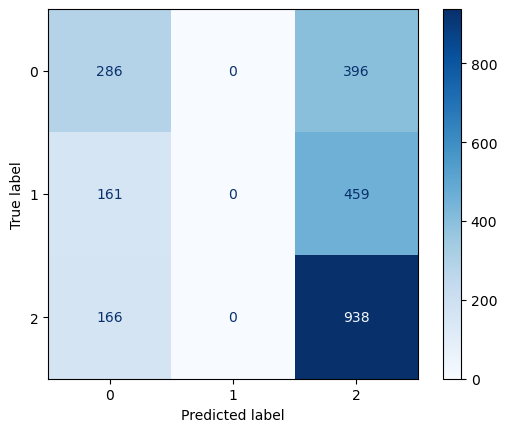

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%matplotlib inline

#gather the predictions for our test dataset
predictions = lr_model.predict(x_test)

# construct the confusion matix - this retrns an array
cm = confusion_matrix(y_test, predictions, labels=lr_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [120]:
lr_model.predict_proba(x_test)[:5]

array([[0.26005168, 0.26506405, 0.47488427],
       [0.25523355, 0.27595091, 0.46881553],
       [0.62740162, 0.21577095, 0.15682742],
       [0.28812509, 0.28891274, 0.42296217],
       [0.58265569, 0.22703871, 0.1903056 ]])

In [123]:
# Define the 'Home' and 'Away' encoded values
home_encoded = 0  #'Arsenal'
away_encoded = 26  #'Manchester City'

# Define the 'WinPercentageHome' and 'WinPercentageAway' values
home_win_percentage = 64.2
away_win_percentage = 40.8

# Create a DataFrame with the encoded values and additional features
match_data = {
    'Home': [home_encoded],
    'Away': [away_encoded],
    'WinPercentageHome': [home_win_percentage],
    'WinPercentageAway': [away_win_percentage]
}
match_df = pd.DataFrame(match_data)

# Use the trained model to predict the outcome of the match
predicted_outcome = lr_model.predict(match_df)

# Print the predicted outcome
print("Predicted Outcome (FTR):", predicted_outcome)

Predicted Outcome (FTR): [2]


## This game ended 1-0 Arsenal. Our prediction was successfull.

In [126]:
# Define the 'Home' and 'Away' encoded values
home_encoded = 26  #Man City
away_encoded = 0   #Arsenal

# Define the 'WinPercentageHome' and 'WinPercentageAway' values
home_win_percentage = 59.40
away_win_percentage = 44.20

# Create a DataFrame with the encoded values and additional features
match_data = {
    'Home': [home_encoded],
    'Away': [away_encoded],
    'WinPercentageHome': [home_win_percentage],
    'WinPercentageAway': [away_win_percentage]
}
match_df = pd.DataFrame(match_data)

# Use the trained model to predict the outcome of the match
predicted_outcome = lr_model.predict(match_df)

# Print the predicted outcome
print("Predicted Outcome (FTR):", predicted_outcome)

Predicted Outcome (FTR): [2]


## Actual outcome: 0-0. City was favorited by the sportsbook this game so prediction makes sense.

In [127]:
# Define the 'Home' and 'Away' encoded values
home_encoded = 18 #Everton  
away_encoded = 25 #Liverpool

# Define the 'WinPercentageHome' and 'WinPercentageAway' values
home_win_percentage = 45.88
away_win_percentage = 42.35

# Create a DataFrame with the encoded values and additional features
match_data = {
    'Home': [home_encoded],
    'Away': [away_encoded],
    'WinPercentageHome': [home_win_percentage],
    'WinPercentageAway': [away_win_percentage]
}
match_df = pd.DataFrame(match_data)

# Use the trained model to predict the outcome of the match
predicted_outcome = lr_model.predict(match_df)

# Print the predicted outcome
print("Predicted Outcome (FTR):", predicted_outcome)

Predicted Outcome (FTR): [0]


## This game was played earlier today and ended with a 2-0 Home Win for Everton, against our models predictions, the sportsbooks had Everton ML at 7x and Liverpool was 1.4x. You cant predict football! 

In [ ]:
### Using pycaret to find the best model for our data 